Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing and Preprocessing the Dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.info()
X = dataset.iloc[:, :-1].values #we require the customer id column to know about the customers with fraud application
y = dataset.iloc[:, -1].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(X)
print(X_scaled)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


Importing and Training the SOM

In [4]:
#som is not available in tensorflow or scikit learn
%pip install MiniSom
from minisom import MiniSom

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
som = MiniSom(x=10, y=10, input_len=15) #10, 10 is the size of the grid required and it is based on the no of inputs and clusters, input_len is no of features in X_scaled
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=100)

Analysing and Visualisation of results

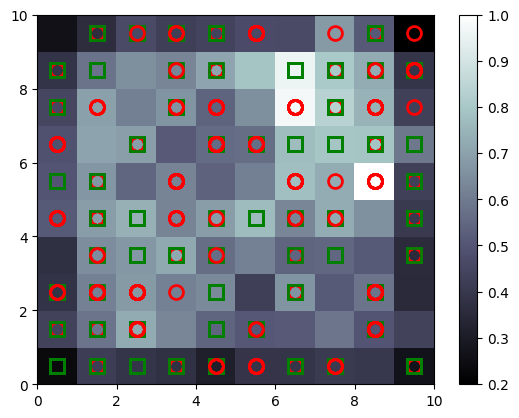

In [6]:
from pylab import bone, colorbar, pcolor, plot, show, savefig
bone() #initialises a white window
pcolor(som.distance_map().T) #colors the grid with lowest to highest mean interneuron distance
colorbar() #adds the legend to show which point corresponds to what value
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X_scaled):
    W = som.winner(x)
    plot(W[0]+0.5, W[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2) #if y[i] = 1 green square(approved), 0 -> red circle(rejected)
savefig('SOM.png')
show()

Finding Frauds

In [10]:
mappings = som.win_map(X_scaled) #dictionary of winning customers

# Step 1: Get the U-Matrix (mean distances between neurons)
distance_map = som.distance_map()
# Step 2: Define a threshold — this is tunable.
# A common approach is to use mean + 1 or 2 standard deviations.
threshold = np.mean(distance_map) + 2*np.std(distance_map)
# Step 3: Get coordinates where distance exceeds threshold
outlier_coords = np.argwhere(distance_map > threshold)

print("Potential outlier nodes (coordinates):")
print(outlier_coords)

Potential outlier nodes (coordinates):
[[6 7]
 [6 8]
 [8 5]]


In [ ]:
frauds = []
for coord in outlier_coords:
    frauds.extend(mappings[tuple(coord)])
frauds = sc.inverse_transform(frauds)
print(frauds[:, 0])

[15651868. 15716082. 15651460. 15672637. 15752344. 15736533. 15779207.
 15792107. 15813192. 15615296. 15654859. 15723827. 15799785. 15725028.
 15731989. 15706394. 15667460. 15648069. 15694666. 15593959. 15629750.
 15592999. 15742009. 15611409. 15636454. 15608916.]
